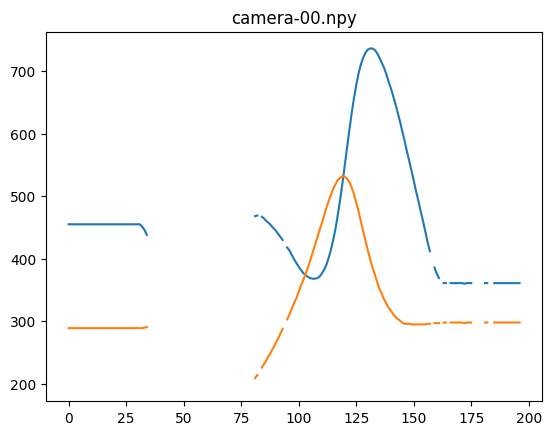

(197, 2)


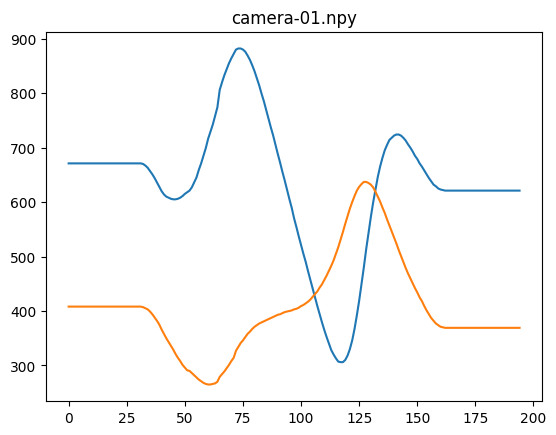

(195, 2)


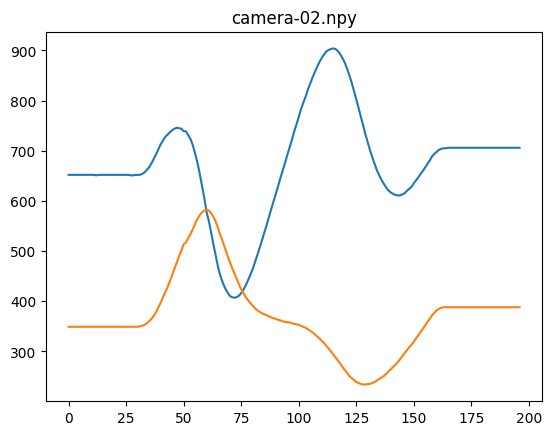

(197, 2)


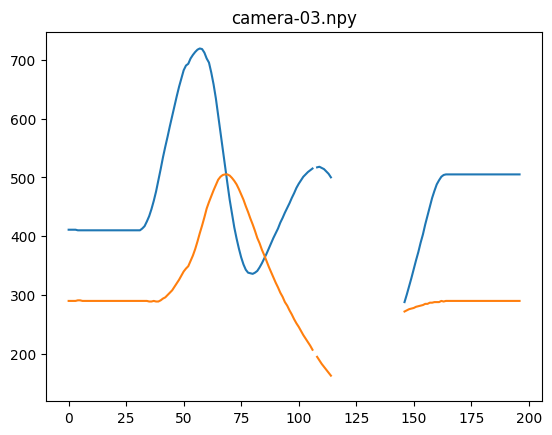

(197, 2)


In [10]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(0,4):
    coord0 = np.load(f"camera-0{i}.npy")
    plt.title(f"camera-0{i}.npy")
    plt.plot(coord0)
    plt.show()
    #print(coord0)
    print(np.shape(coord0))

In [17]:
import json
import numpy as np
coord0 = np.load(f"camera-00.npy")
coord1 = np.load(f"camera-01.npy")
coord2 = np.load(f"camera-02.npy")
coord3 = np.load(f"camera-03.npy")

# Function to read the intrinsic and extrinsic parameters of each camera
def camera_parameters(file):
    camera_data = json.load(open(file))
    K = np.array(camera_data['intrinsic']['doubles']).reshape(3, 3)
    res = [camera_data['resolution']['width'],
           camera_data['resolution']['height']]
    tf = np.array(camera_data['extrinsic']['tf']['doubles']).reshape(4, 4)
    R = tf[:3, :3]
    T = tf[:3, 3].reshape(3, 1)
    dis = np.array(camera_data['distortion']['doubles'])
    return K, R, T, res, dis

def calculate_wi(K,R,ui,vi):
    W = np.linalg.inv(K@R)
    hom_coord = np.array([[ui],[vi],[1]])
    W = W@hom_coord
    #print(np.shape(W))
    #print(W)
    return W

K0, R0, T0, res0, dis0 = camera_parameters('calibracao/0.json')
K1, R1, T1, res1, dis1 = camera_parameters('calibracao/1.json')
K2, R2, T2, res2, dis2 = camera_parameters('calibracao/2.json')
K3, R3, T3, res3, dis3 = camera_parameters('calibracao/3.json')
x = []
y = []
z = []
for i in range(0,len(coord1)):
    coord = np.array([[coord0[i]],[coord1[i]],[coord2[i]],[coord3[i]]])
    if np.any(np.isnan(coord)):
        continue
    W0 = calculate_wi(K0,R0,coord0[i][0],coord0[i][1])
    W1 = calculate_wi(K1,R1,coord1[i][0],coord1[i][1])
    W2 = calculate_wi(K2,R2,coord2[i][0],coord2[i][1])
    W3 = calculate_wi(K2,R2,coord3[i][0],coord3[i][1])
    I = np.identity(3)
    O = np.zeros((3,1))
    b = np.vstack((np.linalg.inv(R0)@T0,np.linalg.inv(R1)@T1,np.linalg.inv(R2)@T2,np.linalg.inv(R3)@T3))
    A1 = np.hstack([-I,W0,O,O,O])
    A2 = np.hstack([-I,O,W1,O,O])
    A3 = np.hstack([-I,O,O,W2,O])
    A4 = np.hstack([-I,O,O,O,W3])
    A = np.vstack([A1,A2,A3,A4])
    print(coord)
    print(np.isnan(coord))
    lambda_ = np.linalg.pinv(A)@b
    
    print("x:",lambda_[0,0])
    x.append(lambda_[0,0])
    print("y:",lambda_[1,0])
    y.append(lambda_[1,0])
    print("z:",lambda_[2,0])
    z.append(lambda_[2,0])
    print(np.shape(lambda_))
    print(lambda_)

[[[455. 289.]]

 [[671. 408.]]

 [[652. 349.]]

 [[411. 290.]]]
[[[False False]]

 [[False False]]

 [[False False]]

 [[False False]]]
x: -0.34909664497330883
y: 0.12957237771033991
z: 5.056375709910112
(7, 1)
[[-0.34909664]
 [ 0.12957238]
 [ 5.05637571]
 [-0.27964652]
 [ 0.42468985]
 [ 0.00724121]
 [-0.04722454]]
[[[455. 289.]]

 [[671. 408.]]

 [[652. 349.]]

 [[411. 290.]]]
[[[False False]]

 [[False False]]

 [[False False]]

 [[False False]]]
x: -0.34909664497330883
y: 0.12957237771033991
z: 5.056375709910112
(7, 1)
[[-0.34909664]
 [ 0.12957238]
 [ 5.05637571]
 [-0.27964652]
 [ 0.42468985]
 [ 0.00724121]
 [-0.04722454]]
[[[455. 289.]]

 [[671. 408.]]

 [[652. 349.]]

 [[411. 290.]]]
[[[False False]]

 [[False False]]

 [[False False]]

 [[False False]]]
x: -0.34909664497330883
y: 0.12957237771033991
z: 5.056375709910112
(7, 1)
[[-0.34909664]
 [ 0.12957238]
 [ 5.05637571]
 [-0.27964652]
 [ 0.42468985]
 [ 0.00724121]
 [-0.04722454]]
[[[455. 289.]]

 [[671. 408.]]

 [[652. 349.]]

 

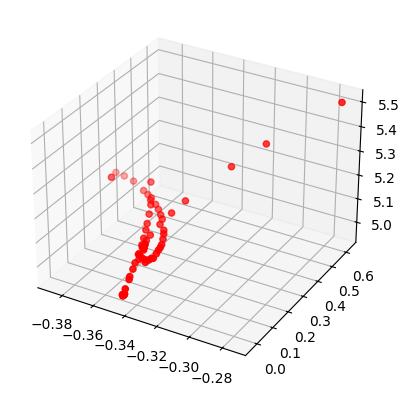

In [18]:
import matplotlib.pyplot as plt

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z, c='r', marker='o')

plt.show()

In [11]:
print(coord)

[[ nan  nan]
 [657. 399.]
 [667. 360.]
 [434. 289.]]


In [5]:
print(len(coord1))

195


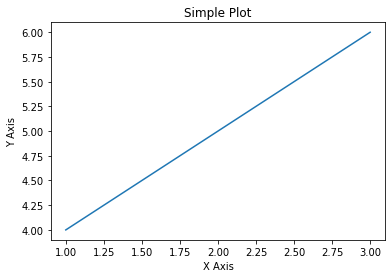

In [1]:
import matplotlib.pyplot as plt

# Create a simple plot
plt.plot([1, 2, 3], [4, 5, 6])
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Simple Plot')
plt.show()

In [56]:
print(len(z))
print(len(x))
print(len(y))

35
35
35


In [6]:
print(x)
print(y)

[np.float64(-0.34909664497330883), np.float64(-0.34909664497330883), np.float64(-0.34909664497330883), np.float64(-0.34909664497330883), np.float64(-0.3490597888513265), np.float64(-0.3490597888513265), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490884131172986), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490855696324032), np.float64(-0.3490884131172986), np.float64(-0.3490884131172986), np.float64(-0.3490855696324032), np.fl